In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from collections import defaultdict
import seaborn as sns

In [2]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=ea49728c02e05afb198257be612dad1d307a06823ccd5753c0cbcbbcd9e60475
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TextVectorization, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Cleaning data

In [87]:
df = pd.read_csv("/content/train_book_data.csv")
df

,Unnamed: 0,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,78613,Catherine E. Bolten,Hardcover,Utilizing narratives of seven different people...,"Western Africa,Sierra Leone",https://i.gr-assets.com/images/S/compressed.ph...,520273788,9.78052E+12,https://goodreads.com/book/show/15805622-i-did...,296,4.00,0,I Did It to Save My Life: Love and Survival in...,19
1,32927,True Everett,ebook,From their 1974 debut at New York's premier pu...,NaN,NaN,857120603,9.78E+12,https://goodreads.com/book/show/12305689-hey-h...,0,0.00,0,Hey Ho Let's Go - The Story Of The Ramones,0
2,12602,Roy Richard Grinker,Hardcover,"Unstrange Minds, documents Grinker's quest to ...","Nonfiction,Psychology,Science,Disability,Anthr...",https://i.gr-assets.com/images/S/compressed.ph...,465027636,9.78E+12,https://goodreads.com/book/show/108381.Unstran...,352,3.96,80,Unstrange Minds: Remapping the World of Autism,732
3,97452,Jacques Ferrandez,NaN,NaN,NaN,https://i.gr-assets.com/images/S/compressed.ph...,2203390026,9.7822E+12,https://goodreads.com/book/show/1721063.Carnet...,0,4.40,0,"Carnets D'orient, Tome 6: La Guerre FantÃ´me",5
4,77050,Wes Marshall,Paperback,"The Wine Roads of Texas, the inspiration for t...","Alcohol,Wine",https://i.gr-assets.com/images/S/compressed.ph...,1893271439,9.78189E+12,https://goodreads.com/book/show/1577230.The_Wi...,221,3.78,1,The Wine Roads of Texas: An Essential Guide to...,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,97945,"Cornelia Homburg,John House,Elizabeth C. Childs",Hardcover,Dozens of reproductions highlight the work of ...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,847823326,9.78085E+12,https://goodreads.com/book/show/1723860.Vincen...,256,3.50,1,Vincent Van Gogh and the Painters of the Petit...,2
94996,64898,"Kenneth Robeson,Lester Dent",Paperback,"WHO IS DOC SAVAGE?,To the world at large, Doc ...","Adventure,Pulp,Fiction,Science Fiction,Fantasy...",https://i.gr-assets.com/images/S/compressed.ph...,553101269,9.78055E+12,https://goodreads.com/book/show/1439718.Quest_...,138,3.76,19,Quest of Qui,258
94997,93803,Katie Wood Ray,Paperback,No one can say it better than Lucy Calkins-Kat...,"Teaching,Education,Language,Writing",https://i.gr-assets.com/images/S/compressed.ph...,325003645,9.78033E+12,https://goodreads.com/book/show/1685114.What_Y...,208,4.26,11,What You Know by Heart: How to Develop Curricu...,121
94998,76971,Creative Edge,NaN,NaN,"Childrens,Picture Books,Sequential Art,Graphic...",NaN,NaN,9.7814E+12,https://goodreads.com/book/show/15769986-speed...,0,3.67,0,Speed! I Am Speed! (Disney Comics Collection: ...,3


In [88]:
df.dropna(subset=["genre",  "desc"], inplace=True)
df.drop_duplicates(subset=["desc"], inplace=True)

In [89]:
data = df.copy()

In [90]:
from langdetect import detect

In [127]:
def clean_descriptions(data):
    def is_valid_desc(row):
        try:
            detect(row['desc'])
            return True
        except:
            return False

    valid_desc_mask = data.apply(is_valid_desc, axis=1)
    data = data[valid_desc_mask]
    return data


In [92]:
data = clean_descriptions(data)

In [93]:
data

,Unnamed: 0,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,78613,Catherine E. Bolten,Hardcover,Utilizing narratives of seven different people...,"Western Africa,Sierra Leone",https://i.gr-assets.com/images/S/compressed.ph...,520273788,9.78052E+12,https://goodreads.com/book/show/15805622-i-did...,296,4.00,0,I Did It to Save My Life: Love and Survival in...,19
2,12602,Roy Richard Grinker,Hardcover,"Unstrange Minds, documents Grinker's quest to ...","Nonfiction,Psychology,Science,Disability,Anthr...",https://i.gr-assets.com/images/S/compressed.ph...,465027636,9.78E+12,https://goodreads.com/book/show/108381.Unstran...,352,3.96,80,Unstrange Minds: Remapping the World of Autism,732
4,77050,Wes Marshall,Paperback,"The Wine Roads of Texas, the inspiration for t...","Alcohol,Wine",https://i.gr-assets.com/images/S/compressed.ph...,1893271439,9.78189E+12,https://goodreads.com/book/show/1577230.The_Wi...,221,3.78,1,The Wine Roads of Texas: An Essential Guide to...,9
5,9716,"Raana Raas,GÃ¶rgey Etelka",Hardcover,"A CsodaidÅ‘k nagyregÃ©ny; egy csalÃ¡dÃ© is, eg...","Science Fiction,European Literature,Hungarian ...",https://i.gr-assets.com/images/S/compressed.ph...,NaN,9.79E+12,https://goodreads.com/book/show/10640092-kisza...,416,4.66,7,Kiszakadtak,103
7,93640,Doug Dubosque,Paperback,"From initial concept to finished art, the ""Lea...","Art,Art,Drawing",https://i.gr-assets.com/images/S/compressed.ph...,939217228,9.78094E+12,https://goodreads.com/book/show/1681318.Draw_D...,64,3.85,3,Draw Dinosaurs,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94993,33549,"Yumi Hotta,Takeshi Obata",Paperback,ã€ŽåŒ—æ–—æ¯ã€ã®å„ªå‹å›½ã‚’æ±ºã‚ã‚‹æ—¥éŸ“é...,"Sequential Art,Manga",https://i.gr-assets.com/images/S/compressed.ph...,4087822257,9.78E+12,https://goodreads.com/book/show/12347957-20,228,4.50,0,ãƒ’ã‚«ãƒ«ã®ç¢ å®Œå…¨ç‰ˆ 20,10
94994,2269,NÃºria Roca,Hardcover,"Clara, 35 aÃ±os, divorciada y con dos hijos, t...","Humor,European Literature,Spanish Literature,A...",https://i.gr-assets.com/images/S/compressed.ph...,NaN,9.79E+12,https://goodreads.com/book/show/10156068-los-c...,288,3.20,44,Los caracoles no saben que son caracoles,524
94996,64898,"Kenneth Robeson,Lester Dent",Paperback,"WHO IS DOC SAVAGE?,To the world at large, Doc ...","Adventure,Pulp,Fiction,Science Fiction,Fantasy...",https://i.gr-assets.com/images/S/compressed.ph...,553101269,9.78055E+12,https://goodreads.com/book/show/1439718.Quest_...,138,3.76,19,Quest of Qui,258
94997,93803,Katie Wood Ray,Paperback,No one can say it better than Lucy Calkins-Kat...,"Teaching,Education,Language,Writing",https://i.gr-assets.com/images/S/compressed.ph...,325003645,9.78033E+12,https://goodreads.com/book/show/1685114.What_Y...,208,4.26,11,What You Know by Heart: How to Develop Curricu...,121


finding the types of languages in book descriptions

In [94]:
data["language"] = data["desc"].apply(detect)

<ipython-input-95-9ab3ea5d2868>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_data, rotation = 90)


<BarContainer object of 33 artists>

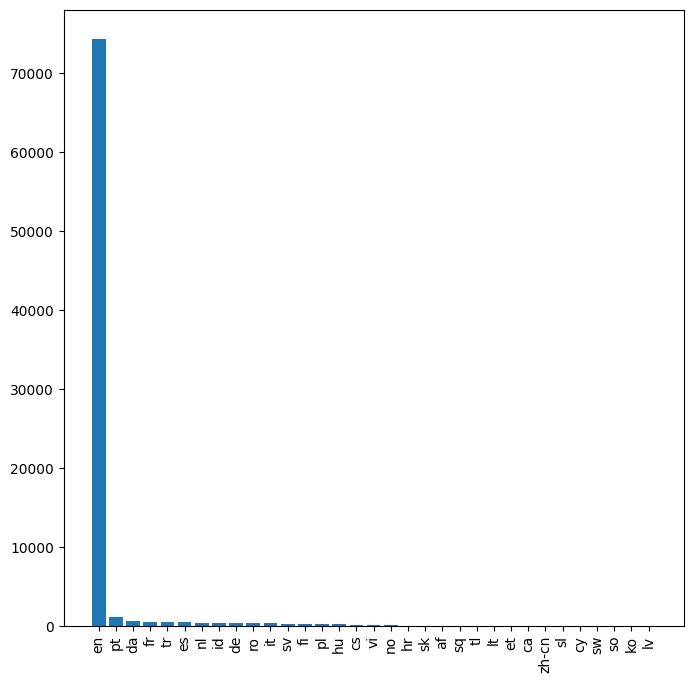

In [95]:
x_data = data.language.value_counts().index
y_data = data.language.value_counts().values
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xticklabels(x_data, rotation = 90)
ax.bar(x_data, y_data)

In [96]:
data = data[data.language == "en"]

Calculating the frequency of each genre

In [97]:
def genre_count(x):
  '''returns the number of genres associated with the book'''
  return len(x.split(','))

data['genre_count'] = data['genre'].map(lambda x: genre_count(x))

<ipython-input-97-fbf9d383948e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre_count'] = data['genre'].map(lambda x: genre_count(x))


make a genre columns into a list of all genres

In [98]:
def genre_listing(x):
    lst = [genre for genre in x.split(",")]
    return lst

data['genre_list'] = data['genre'].map(lambda x: genre_listing(x))

<ipython-input-98-9b28e6cf82b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre_list'] = data['genre'].map(lambda x: genre_listing(x))


In [128]:
from collections import Counter
genre_counts = Counter(genre for genres in data["genre_list"] if isinstance(genres, list) for genre in genres)

In [100]:
len(genre_counts)

1170

In [101]:
genre_counts

Counter({'Western Africa': 147,
         'Sierra Leone': 10,
         'Nonfiction': 26147,
         'Psychology': 3053,
         'Science': 9729,
         'Disability': 300,
         'Anthropology': 906,
         'Health': 2635,
         'Education': 1144,
         'Mental Health': 642,
         'Aspergers': 42,
         'Medical': 490,
         'Alcohol': 359,
         'Wine': 143,
         'Art': 5409,
         'Drawing': 268,
         'Writing': 2794,
         'Essays': 1227,
         'Philosophy': 4772,
         'Literature': 8995,
         'Criticism': 676,
         'Literary Criticism': 382,
         'European Literature': 4138,
         'Spanish Literature': 236,
         'Classics': 3968,
         'Cultural': 11129,
         'Latin American': 131,
         '20th Century': 1212,
         'Young Adult': 9014,
         'Fiction': 25008,
         'War': 5112,
         'Spy Thriller': 568,
         'Espionage': 440,
         'Adventure': 4879,
         'Historical': 16161,
         

In [102]:
genre_pd = pd.DataFrame.from_records(sorted(genre_counts.items(), key=lambda x:x[1], reverse=True),
                                     columns=['genre', 'count'])
top_30_genres = genre_pd[:30]

<Axes: xlabel='genre'>

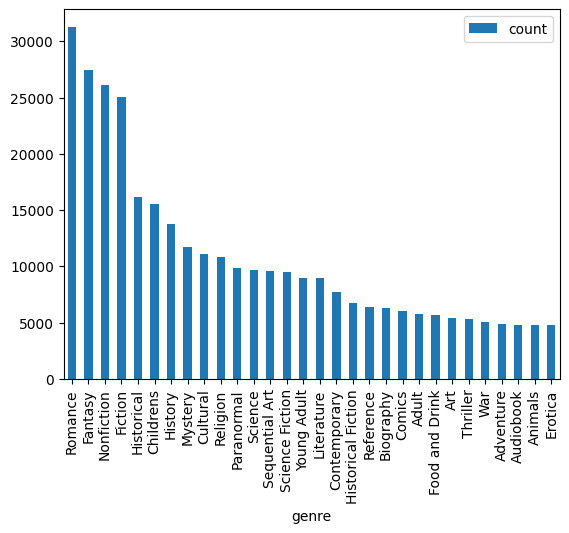

In [103]:
top_30_genres.plot(x="genre", y="count", kind="bar")

In [104]:
data["genre_list"]

0                           [Western Africa, Sierra Leone]
2        [Nonfiction, Psychology, Science, Disability, ...
4                                          [Alcohol, Wine]
7                                      [Art, Art, Drawing]
10       [Nonfiction, Writing, Essays, Philosophy, Lite...
                               ...                        
94990    [Historical, Historical Fiction, Lds, Lds Fict...
94991                       [Religion, Theology, Religion]
94996    [Adventure, Pulp, Fiction, Science Fiction, Fa...
94997             [Teaching, Education, Language, Writing]
94999    [Childrens, Picture Books, Childrens, Space, H...
Name: genre_list, Length: 74337, dtype: object

In [129]:
def determine_fiction(x):
    lower_list = [genre.lower() for genre in x]
    if any('nonfiction' in genre for genre in lower_list):
        return 'nonfiction'
    elif any('fiction' in genre for genre in lower_list):
        return 'fiction'
    else:
        return 'others'

data['label'] = data['genre_list'].apply(determine_fiction)

In [106]:
data.label.value_counts()

fiction       30018
nonfiction    26147
others        18172
Name: label, dtype: int64

In [107]:
data = data[(data.label == "fiction") | (data.label == "nonfiction")]

Text vectorization

In [108]:
import re

def standardize_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [109]:
data['desc'] = data['desc'].apply(standardize_text)

In [110]:
max_length = 200

vectorizer = TextVectorization(
    max_tokens=20000,
    output_sequence_length=max_length,
    output_mode="int"
    )

text_data = data['desc'].values
vectorizer.adapt(text_data)

In [130]:
import numpy as np
from sklearn.model_selection import train_test_split

def custom_stratified_split(data_frame, target_column, validation_percent=0.2, random_state=None):
    train_df, val_df = train_test_split(data_frame, test_size=validation_percent,
                                        stratify=data_frame[target_column],
                                        random_state=random_state)
    return train_df.index.tolist(), val_df.index.tolist()

In [132]:
data.to_csv("cleaned_data_checkpoint.csv")

In [113]:
data["label"] = data["label"].map({"fiction":0, "nonfiction":1})

In [114]:
train_idx, val_idx = custom_stratified_split(data, "label")

In [115]:
train_data = data.loc[train_idx]
val_data = data.loc[val_idx]

y_train = train_data.pop("label")
y_valid = val_data.pop("label")

In [116]:
train_data["desc"].values

array(['if youâ re in your twenties youâ re likely feeling the combination of the excitement of this defining decade and the pressure to figure out your entire life the thrill of newfound independence and opportunity can be quickly squelched by worry disillusionment or disappointment like thousands of other twenty somethings you may have experienced what life coach and quarter life expert christine hassler calls an â œexpectation hangover â this manifesto explores the all important questions and life choices of these turbulent yet exciting years twenty somethings may commiserate about the challenges they face but few resources offer practical lessons or suggestions in these pages quarter life men and women tell their stories sharing their successes and failures along with their frustrations and realizations the authorâ s insightful commentary and â œtake awayâ suggestions provide the tools and skills you need to create change and direction in your life youâ ll recognize and articulate 

In [117]:
train_data = vectorizer(train_data["desc"].values)
val_data = vectorizer(val_data["desc"].values)

In [118]:
train_data.shape

TensorShape([44932, 200])

In [119]:
sequences = vectorizer(text_data)
vocab_size = len(vectorizer.get_vocabulary())

Creating the model

In [120]:
embedding_dim = 256

def lstm_model():
    inputs = keras.Input(shape=(max_length,))
    x = Embedding(vocab_size, output_dim=embedding_dim, input_length=max_length)(inputs)
    x = LSTM(256, return_sequences=True)(x)
    x = LSTM(256, return_sequences=True)(x)
    x = LSTM(256, return_sequences=False)(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)

    model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

    return model

In [121]:
book_model = lstm_model()
book_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 256)          5120000   
                                                                 
 lstm (LSTM)                 (None, 200, 256)          525312    
                                                                 
 lstm_1 (LSTM)               (None, 200, 256)          525312    
                                                                 
 lstm_2 (LSTM)               (None, 256)               525312    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257   

In [43]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    save_best_only=True,
)

book_model.fit(train_data,
    y_train,
    validation_data=(val_data, y_valid),
    batch_size=64,
    epochs=10,
    callbacks=model_checkpoint)

Epoch 1/10
703/703 [==============================] - 108s 146ms/step - loss: 0.6519 - accuracy: 0.6236 - val_loss: 0.6043 - val_accuracy: 0.6521
Epoch 2/10
703/703 [==============================] - 40s 57ms/step - loss: 0.3136 - accuracy: 0.8682 - val_loss: 0.2915 - val_accuracy: 0.8787
Epoch 3/10
703/703 [==============================] - 28s 40ms/step - loss: 0.2251 - accuracy: 0.9046 - val_loss: 0.2250 - val_accuracy: 0.9193
Epoch 4/10
703/703 [==============================] - 25s 36ms/step - loss: 0.0929 - accuracy: 0.9700 - val_loss: 0.1835 - val_accuracy: 0.9409
Epoch 5/10
703/703 [==============================] - 23s 33ms/step - loss: 0.0527 - accuracy: 0.9850 - val_loss: 0.2182 - val_accuracy: 0.9345
Epoch 6/10
703/703 [==============================] - 23s 32ms/step - loss: 0.0358 - accuracy: 0.9904 - val_loss: 0.2787 - val_accuracy: 0.9250
Epoch 7/10
703/703 [==============================] - 22s 31ms/step - loss: 0.0253 - accuracy: 0.9933 - val_loss: 0.3035 - val_accurac

In [123]:
test_data = pd.read_csv("/content/test_book_data.csv")
test_data

,Unnamed: 0,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,70300,Dean Koontz,Hardcover,"Loop me in, odd one.,The words, spoken in the ...","Horror,Fiction,Fantasy,Thriller,Mystery,Fantas...",https://i.gr-assets.com/images/S/compressed.ph...,553804804,9.780550e+12,https://goodreads.com/book/show/14996.Brother_Odd,364,3.99,2497,Brother Odd,64114
1,47975,"Mark Cotta Vaz,Paul Levitz,Nathan Crowley",Hardcover,Explore the complete history of the Batmobile ...,"Dc Comics,Batman,Nonfiction,Sequential Art,Com...",https://i.gr-assets.com/images/S/compressed.ph...,1608871037,9.780000e+12,https://goodreads.com/book/show/13239461-batmo...,148,4.28,8,Batmobile: The Complete History,95
2,21859,Harold Davis,Paperback,Capture the beauty of the world around you wit...,"Art,Photography,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1118027329,9.780000e+12,https://goodreads.com/book/show/11457540-creat...,239,3.83,5,Creative Landscapes: Digital Photography Tips ...,48
3,92093,Ricardo Piglia,Paperback,Esta novela cuenta un caso real. En el Buenos ...,"Fiction,European Literature,Spanish Literature...",https://i.gr-assets.com/images/S/compressed.ph...,8433924621,9.788430e+12,https://goodreads.com/book/show/1654.Plata_que...,232,3.77,150,Plata quemada,1789
4,78427,Andy Chambers,Paperback,"Second novel in the Dark Eldar Path series,The...","40k,Science Fiction,Fiction,Fantasy",https://i.gr-assets.com/images/S/compressed.ph...,1849703000,9.781850e+12,https://goodreads.com/book/show/15802996-path-...,416,3.94,17,Path of the Incubus,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,62192,Charlaine Harris,Hardcover,Louisiana cocktail waitress Sookie Stackhouse ...,"Fantasy,Paranormal,Vampires,Fantasy,Paranormal...",https://i.gr-assets.com/images/S/compressed.ph...,441014941,9.780440e+12,https://goodreads.com/book/show/140075.All_Tog...,323,4.04,3677,All Together Dead,193092
4996,24587,David O. Beale,Paperback,Men from nearly every denomination and all wal...,"History,Philosophy,Fundamentalism,Church,Churc...",https://i.gr-assets.com/images/S/compressed.ph...,890843503,9.780000e+12,https://goodreads.com/book/show/1167480.In_Pur...,475,3.56,6,In Pursuit of Purity (Soft),50
4997,38169,"Eve Kosofsky Sedgwick,Jonathan Goldberg",Hardcover,"The Weather in Proust ,gathers pieces written ...","Philosophy,Theory,Criticism,Literary Criticism...",https://i.gr-assets.com/images/S/compressed.ph...,822351447,9.780000e+12,https://goodreads.com/book/show/12648401-the-w...,221,4.24,5,The Weather in Proust,34
4998,4889,"Pierdomenico Baccalario,Leah Janeczko",Hardcover,In the third installment of the Century Quarte...,"Fantasy,Adventure,Childrens,Middle Grade,Myste...",https://i.gr-assets.com/images/S/compressed.ph...,375858970,9.780000e+12,https://goodreads.com/book/show/10333032-city-...,304,4.02,32,City of Wind,851


In [124]:
test_data.dropna(subset=["desc", "genre"], inplace=True)

In [131]:
import pandas as pd

def process_data(data):
    data = data.assign(language=data["desc"].apply(detect)).query('language == "en"')
    data["desc"] = data["desc"].apply(standardize_text)
    data['genre_list'] = data['genre'].map(genre_listing)
    data['label'] = data['genre_list'].apply(determine_fiction)
    data = data.query('label == "fiction" or label == "nonfiction"')
    data["label"] = data["label"].map({"fiction": 0, "nonfiction": 1})
    return data


In [126]:
test_data = process_data(test_data)

y_test = test_data.pop("label")
test_data = vectorizer(test_data["desc"].values)

<ipython-input-125-19c13285d632>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label"] = data["label"].map({"fiction": 0, "nonfiction": 1})


In [64]:
book_model = keras.saving.load_model("/content/checkpoint_path.keras")

In [66]:
results = book_model.evaluate(test_data, y_test, batch_size=64)

47/47 [==============================] - 1s 13ms/step - loss: 0.1925 - accuracy: 0.9357


In [67]:
def reformat(text):
    a = standardize_text(text)
    a = vectorizer(a)
    a = np.reshape(a, (1, max_length))
    return a

In [68]:
def predict_genre(model,text):
    a = reformat(text)
    a = np.reshape(a, (1, max_length))
    output = model.predict(a, batch_size=1)
    if output < 0.5:
      return "fiction"
    else:
      return "non-fiction"

In [69]:
text = "In a post-apocalyptic future humans live in peace with androids in a domed city. However, a strange series of murders has intruded into bored inspector Re-l Mayer's life."

In [70]:
predict_genre(book_model, text)

1/1 [==============================] - 1s 981ms/step


'fiction'

In [71]:
text_2 = "from the icons of the game to the players who got their big break but never quite broke through the baseball talmud provides a wonderful historical narration of major league jewish baseball in america all the stats the facts the stories and the often unheralded glory the baseball talmud reveals that there is far more to jewish baseball than hank greenberg s powerful slugging and sandy koufax s masterful control from ausmus to zinn berg to kinsler holtzman to yeager and many others megdal draws upon the lore and the little known details that increase our enjoyment of the game including which jewish player spent a portion of his retirement as a spywho received 50 000"

In [72]:
predict_genre(book_model, text_2)

1/1 [==============================] - 0s 27ms/step


'non-fiction'

In [73]:
book_model.save("fiction_model.h5")